In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from decision_tree import Tree
from datasets import *
from fitness import *
from ea import *
from visual_utils import *
from perturbs import *
from crossovers import *

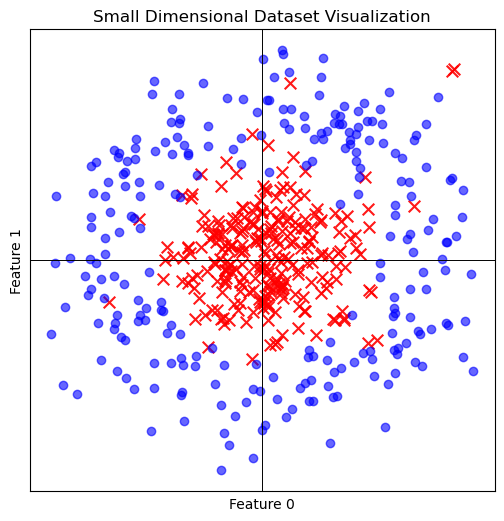

In [63]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

# dataset_dict = generate_multidimensional_dataset()
# visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

fitness_fn_1 = lambda tree: fitness(tree, dataset_dict)

alt_dataset_dict = generate_small_dataset(n_samples=2000, random_seed=1101)
fitness_fn_2 = lambda tree: fitness(tree, alt_dataset_dict)

In [64]:
# perturbation = lambda tree: randomly_grow(
#     tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.05
# )


perturbation = lambda tree: combined_perturb(
    tree,
    feature_bounds=dataset_dict["feature_bounds"],
    prob_value=0.05,  # change value by a small step
    prob_add=0.06,  # expand leaf
    prob_prune=0.01,  # prune somewhere
)


fitness_fn = fitness_fn_1

# init_fn = lambda: Tree(
#     feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
#     )

# init_fn = lambda : Tree(
#         feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip"
#     )

init_fn = lambda : Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="clever"
    )

prob_crossover = 0.8
prob_mutation = 0.5
tournament_size = 25
population_size = 350

# do not change below:
max_evals = 10_000
trials = 10

fitness_list = []
alt_fitness_list = []
sizes = []
for trial in range(trials):

    results = evolutionary_algorithm(
        fitness_function=fitness_fn,
        perturb_fn=perturbation,
        init_fn=init_fn,
        max_evaluations=max_evals,
        crossover_fn=crossover_swap_random_subtrees,  # only one implemented
        prob_crossover=prob_crossover,
        prob_mutation=prob_mutation,
        tournament_size=tournament_size,
        population_size=population_size
    )

    fitness_list.append(results["best_fitness"])
    sizes.append(results["best_tree"].size())
    alt_fitness_list.append(fitness_fn_2(results["best_tree"]))

fitness_list = np.array(fitness_list)
sizes = np.array(sizes)

print("fitness: ")
print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)

print("alt fitness: (test data)")
print(np.mean(alt_fitness_list), np.std(alt_fitness_list))
print(alt_fitness_list)

print("sizes: ")
print(np.mean(sizes), np.std(sizes))
print(sizes)

fitness: 
0.9564 0.002939387691339816
[0.952 0.962 0.954 0.96  0.958 0.958 0.954 0.956 0.956 0.954]
alt fitness: (test data)
0.9119000000000002 0.007056202944927255
[0.919, 0.898, 0.913, 0.9065, 0.9085, 0.921, 0.9175, 0.914, 0.904, 0.9175]
sizes: 
57.4 16.680527569594435
[47 89 61 57 63 65 19 51 65 57]


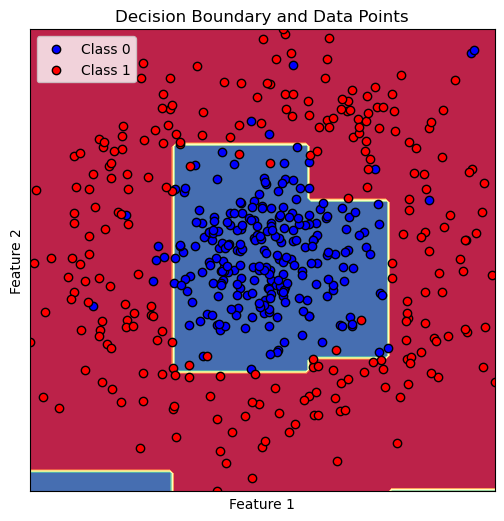

best fitness:  0.958


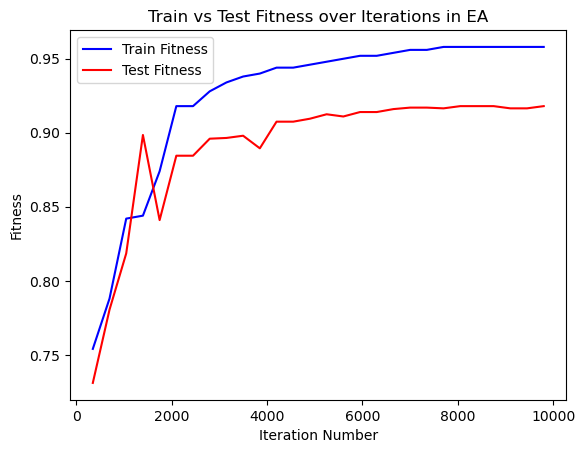

71


In [69]:
results = evolutionary_algorithm(
    fitness_function=fitness_fn,
    perturb_fn=perturbation,
    init_fn=init_fn,
    max_evaluations=max_evals,
    crossover_fn=crossover_swap_random_subtrees,  # only one implemented
    prob_crossover=prob_crossover,
    prob_mutation=prob_mutation,
    tournament_size=tournament_size,
    population_size=population_size,
)

best_tree = results["best_tree"]
visualise_tree_decision(best_tree, dataset_dict)
best = results["best_fitness"]
print("best fitness: ", best)
history = results["history"]

# evolving_fitnesses = [iteration["best_overall_fitness"] for iteration in history]
# plt.plot(
#     population_size * (np.arange(len(evolving_fitnesses)) + 1),
#     evolving_fitnesses,
# )
# plt.xlabel("Iteration Number")
# plt.ylabel("Evolving Fitness")
# plt.title("Evolving Fitness vs Iteration Number")
# plt.show()

train_fitness = [iteration["best_overall_fitness"] for iteration in history]
test_fitness = [fitness_fn_2(iteration["best_individual"]) for iteration in history]
plt.plot(
    population_size * (np.arange(len(train_fitness)) + 1),
    train_fitness,
    label='Train Fitness',
    color='blue'
)
plt.plot(
    population_size * (np.arange(len(test_fitness)) + 1),
    test_fitness,
    label='Test Fitness',
    color='red'
)
plt.xlabel("Iteration Number")
plt.ylabel("Fitness")
plt.title("Train vs Test Fitness over Iterations in EA")
plt.legend()
plt.show()

print(best_tree.size())